<h1><center> Car Price Prediction </center></h1>

## Objectives

__This project is a course project from IBM Data Science. The dataset is copied from that course.__ 

In this project, the automobile data are anaylized to get a price model. Then this model is used to predict the car price based on several metrics. An organization of this project is:

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>
            <a>Download Data</a>
        </li>
     </ul>
    <ul>
        <li>
            <a>Data Wrangling</a>
            <ul>
                <li>Deal wiht Missing Data</li>
                <li>Correct Data Format</li>
                <li>Data Standardization</li>
                <li>Data Normalization</li>
                <li>Binning</li>
                <li>Dummy Variable</li>
            </ul>
        </li>
     </ul>
     <ul>
        <li>
            <a>Data Exploratory</a>
            <ul>
                <li>Visualization</li>
                <li>Descriptive</li>
                <li>Grouping</li>
            </ul>
        </li>
    </ul>
    <ul>
        <li>
            <a>Model Development</a>
            <ul>
                <li>Linear Regression</li>
                <li>Polynomial Regression</li>
                <li>Ridge Regression</li>
                <li>Decision Tree Regression</li>
                <li>Support Vector Regression</li>
                <li>Lasso Regression</li>
                <li>Gaussian Regression</li>
            </ul>
        </li>
    </ul>
</div>

<hr>

In [1]:
#import libraries
import pandas as pd
import numpy as np

## 1. Dowanload data

There are various formats for a dateset: *.cac, *.json, *.xlsx etc. The dataset can be stored in different places, on your local machine or sometimes online. 
In this project, the automobile dataset is an online source and in *.csv format. 
<ul>
    <li>Data source: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a></li>
    <li>Data type: csv</li>
</ul>


Here uses pandas.read_csv() function to read the *.csv file. 

In [2]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

In [3]:
# read the online data by the URL above
Auto_data = pd.read_csv(path, header=None)

In [4]:
# size of data 
NR = np.size(Auto_data,0)
NC = np.size(Auto_data,1)
print('There are ', NR, ' samples of data and ', NC, ' properties')

There are  205  samples of data and  26  properties


In [5]:
#add header to the dataframe
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
Auto_data.columns = headers

In [6]:
#check the first 5 rows of data
Auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 2. Data Wrangling

From the first 10 rows of data, we can see there are "?" as data. We need to correct those error before analyzing. Also, we need to convert data from initial format to a format that may be better for analysis.

In [7]:
# replacing ? with np.nan
Auto_data.replace('?', np.NaN, inplace = True)

In [8]:
#Evaluating the missing data
missing_data = Auto_data.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" means the data is missing. 

In [9]:
#Here use info() to count non-null values or missing values in each column
Auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Based on the summary above, each column has 201 samples of data and seven columns containing missing data.

<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

### Deal with missing data

There are several methods when dealing with missing data
<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

#### Replace the "normalized_losses" by mean

In [10]:
mean_loss = int(Auto_data['normalized-losses'].astype('float').mean(axis=0))
print("Average of normalized-losses:", mean_loss)
Auto_data['normalized-losses'].replace(np.nan, mean_loss, inplace = True)

Average of normalized-losses: 122


#### Replace the "stroke" by mean

In [11]:
mean_stroke = round(Auto_data['stroke'].astype('float').mean(axis=0),2)
print("Average of stroke:", mean_stroke)
Auto_data['stroke'].replace(np.nan, mean_stroke, inplace = True)

Average of stroke: 3.26


#### Replace the "bore" by mean

In [12]:
mean_bore = round(Auto_data['bore'].astype('float').mean(axis=0),2)
print("Average of bore:", mean_bore)
Auto_data['bore'].replace(np.nan, mean_bore, inplace = True)

Average of bore: 3.33


#### Replace the "horsepower" by mean

In [13]:
mean_horsepower = int(Auto_data['horsepower'].astype('float').mean(axis=0))
print("Average of horsepower:", mean_horsepower)
Auto_data['horsepower'].replace(np.nan, mean_horsepower, inplace = True)

Average of horsepower: 104


#### Replace the "peak-rpm" by mean

In [14]:
mean_rpm = int(Auto_data['peak-rpm'].astype('float').mean(axis=0))
print("Average of peak-rpm:", mean_rpm)
Auto_data['peak-rpm'].replace(np.nan, mean_rpm, inplace = True)

Average of peak-rpm: 5125


#### Replace the "num-of-doors" by four

In [15]:
Auto_data['num-of-doors'].replace(np.nan, 'four', inplace = True)

#### Drop "price" data

In [16]:
#Since price is the key property we want to predict, we drop the data when price is np.nan
Auto_data = Auto_data.dropna(subset=['price'],axis=0)

In [17]:
# size of data 
NR = np.size(Auto_data,0)
NC = np.size(Auto_data,1)
print('There are ', NR, ' samples of data and ', NC, ' properties')

There are  201  samples of data and  26  properties


In [18]:
Auto_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


#### Correct data format

The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In [19]:
# check the data type
Auto_data.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

As seen above, some columns are not of the correct data type. For example, "bore" and "stroke" are numerical and should be float.

In [20]:
#change data format using astype()
Auto_data[['normalized-losses']] = Auto_data[['normalized-losses']].astype('int')
Auto_data[['bore','stroke']] = Auto_data[['bore','stroke']].astype('float')
Auto_data[['horsepower','peak-rpm']] = Auto_data[['horsepower','peak-rpm']].astype('int')
Auto_data[['price']] = Auto_data[['price']].astype('float')

In [21]:
Auto_data.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int32
peak-rpm               int32
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Data Standardization

Data is usually collected from different agencies in different formats. It is necessary to transform data ionto a common format, allowing the reseracher to make a meaningful comparison. For example, we can transform mpg to L/100km. We can convert date format from yyyy-mm-dd to mm-dd-yyyy.

__What is standardization?__

Stardardization is the process of transforming data into a common format, allowing the reseracher to make meaningful comparisons. 


In [22]:
#Convert mpg to L/100km. add a column of 'city-L/100km'
Auto_data['city-L/100km'] = 235/Auto_data['city-mpg']
Auto_data[['city-L/100km']] = Auto_data[['city-L/100km']].astype('int')

### Data Normalization

Normalization is the process of transforming values of several variables into a similar range. Typical normalization include scaling the variable so the average is 0, scaling so the variance is 1, or scaling so the values range from 0 to 1. 

In [23]:
#scale the columns "length", "width", "height"
Auto_data['length'] = Auto_data['length']/Auto_data['length'].max()
Auto_data['width'] = Auto_data['width']/Auto_data['width'].max()
Auto_data['height'] = Auto_data['height']/Auto_data['height'].max()

### Binning

Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.

In this dataset, "horsepower" is a real valued variable ranging from 48 to 288. It has 59 unique values. What if we only care about the price difference between cars with high, medium and low horsepower (3 types)? 

Text(0.5, 1.0, 'horsepower bins')

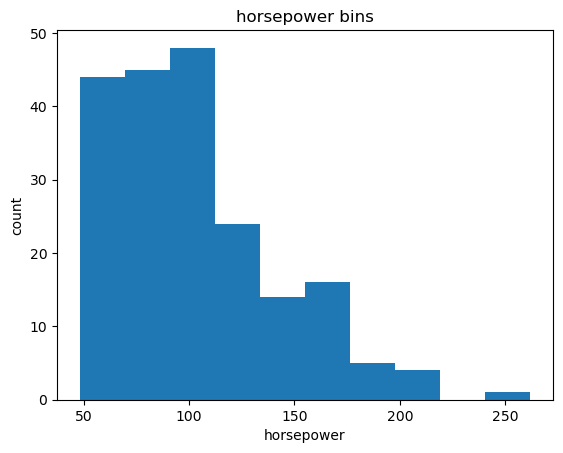

In [24]:
#Let's plot histogram of horsepower
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(Auto_data["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [25]:
# divide the horsepower into 3 bins
bins = np.linspace(min(Auto_data['horsepower']),max(Auto_data['horsepower']),4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [26]:
#set the bins names
bins_name = ['Low', 'Medium', 'High']

In [27]:
#apply the function cut() to determine what each value of 'horsepower' belongs to
Auto_data['horsepower-binned'] = pd.cut(Auto_data['horsepower'], bins, labels = bins_name, include_lowest = True)

Text(0.5, 1.0, 'horsepower bins')

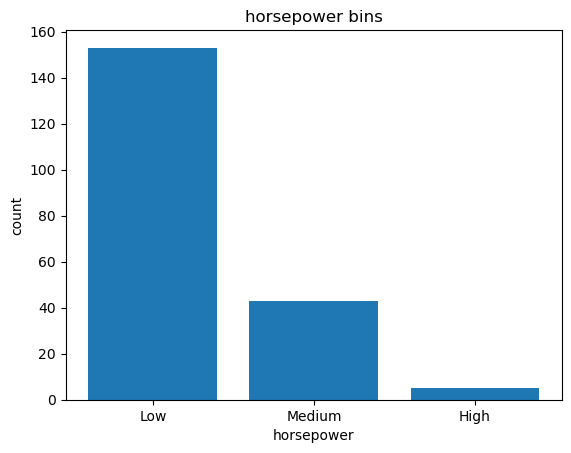

In [28]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(bins_name, Auto_data["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

### Indicator Variable ( or Dummy Variable)

An indicator variabl (or dmmy variable) is a numberical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. For example, the column "fiel-type" has two unique values, "gas" and "diesel". Regression doesn't understand words, only numbers. To use this attribute, we need to convert "fuel-type" to indicator variables.

In [29]:
# we use "get_dummines" to assign numerical values to different categories
dummy_fuel = pd.get_dummies(Auto_data['fuel-type'], dtype=int)
dummy_fuel.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [30]:
#change the column names
dummy_fuel.rename(columns={'gas':'fuel-type-gas','diesel':'fuel-type-diesel'},inplace=True)
dummy_fuel.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [31]:
#add dummy_fuel to Auto_data
Auto_data = pd.concat([Auto_data, dummy_fuel],axis=1)

# drop original column "fuel-type"
Auto_data.drop('fuel-type',axis=1,inplace=True)

In [32]:
Auto_data.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000,21,27,13495.0,11,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000,21,27,16500.0,11,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000,19,26,16500.0,12,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500,24,30,13950.0,9,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500,18,22,17450.0,13,Low,0,1


In [33]:
dummy_aspiration = pd.get_dummies(Auto_data['aspiration'], dtype=int)
dummy_aspiration.head()

,std,turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [34]:
#change the column names
dummy_aspiration.rename(columns={'std':'aspiration-std','turbo':'aspiration-turbo'},inplace=True)
dummy_aspiration.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [35]:
#add dummy_aspiration to Auto_data
Auto_data = pd.concat([Auto_data, dummy_aspiration],axis=1)

# drop original column "dummy_aspiration"
Auto_data.drop('aspiration',axis=1,inplace=True)

In [36]:
Auto_data.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000,21,27,13495.0,11,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,5000,21,27,16500.0,11,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,5000,19,26,16500.0,12,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,5500,24,30,13950.0,9,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,5500,18,22,17450.0,13,Low,0,1,1,0


### 3. Data Exploratory

##### 3.1 Analyzing Individual Feature Using Visualization

Data Exploratory or data analysis is requried to find the features or characteristics of the data to predict price of car. Here analyzes individual feature patterns using visualization.

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

When visualizing individual variables, it is important to first understand the data types of variables. This will help us find the right visualization method for that variable. 

In [38]:
#list the data types
print(Auto_data.dtypes)

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower              int32
peak-rpm                int32
city-mpg                int64
highway-mpg             int64
price                 float64
city-L/100km            int32
horsepower-binned    category
fuel-type-diesel        int32
fuel-type-gas           int32
aspiration-std          int32
aspiration-turbo        int32
dtype: object


Also, we can calcualte the correlation between variables of numerical types using the method corr()

In [39]:
#calcualte correlation
Auto_data.corr(numeric_only=True)

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139987,-0.007654,...,0.075810,0.279739,-0.035527,0.036233,-0.082391,0.066836,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029846,0.055299,...,0.217300,0.239544,-0.225016,-0.181877,0.133999,0.250169,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493234,0.157851,...,0.371178,-0.360301,-0.470606,-0.543304,0.584642,0.481340,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608963,0.123830,...,0.579795,-0.285973,-0.665192,-0.698142,0.690628,0.667931,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544884,0.188796,...,0.615056,-0.245803,-0.633531,-0.680635,0.751265,0.680418,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180417,-0.061156,...,-0.087001,-0.309971,-0.049800,-0.104812,0.135486,0.004047,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644055,0.167357,...,0.757981,-0.279360,-0.749543,-0.794889,0.834415,0.786196,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572585,0.205549,...,0.822668,-0.256734,-0.650546,-0.679571,0.872335,0.740754,0.070779,-0.070779,-0.110040,0.110040
bore,-0.139987,-0.029846,0.493234,0.608963,0.544884,0.180417,0.644055,0.572585,1.000000,-0.055390,...,0.566906,-0.267361,-0.582051,-0.591330,0.543155,0.562579,0.054452,-0.054452,-0.227807,0.227807
stroke,-0.007654,0.055299,0.157851,0.123830,0.188796,-0.061156,0.167357,0.205549,-0.055390,1.000000,...,0.098175,-0.063042,-0.034336,-0.034962,0.082262,0.014689,0.240967,-0.240967,-0.218098,0.218098


From above tables, we can see the correlations between two variables. If the correlation is close to 1, it means two variabels are positively correlated. Otherwise, if the correlation is close to -1, it means two variables are negatively correlated. If the correlation is close to 0, it means two variabels are not correlated. 

#### Countinuous Numerical Variables


Continuous numerical variables are variables that may contain any value within some range. A great way to visulize these variables is using scatterplot with fitted lines.

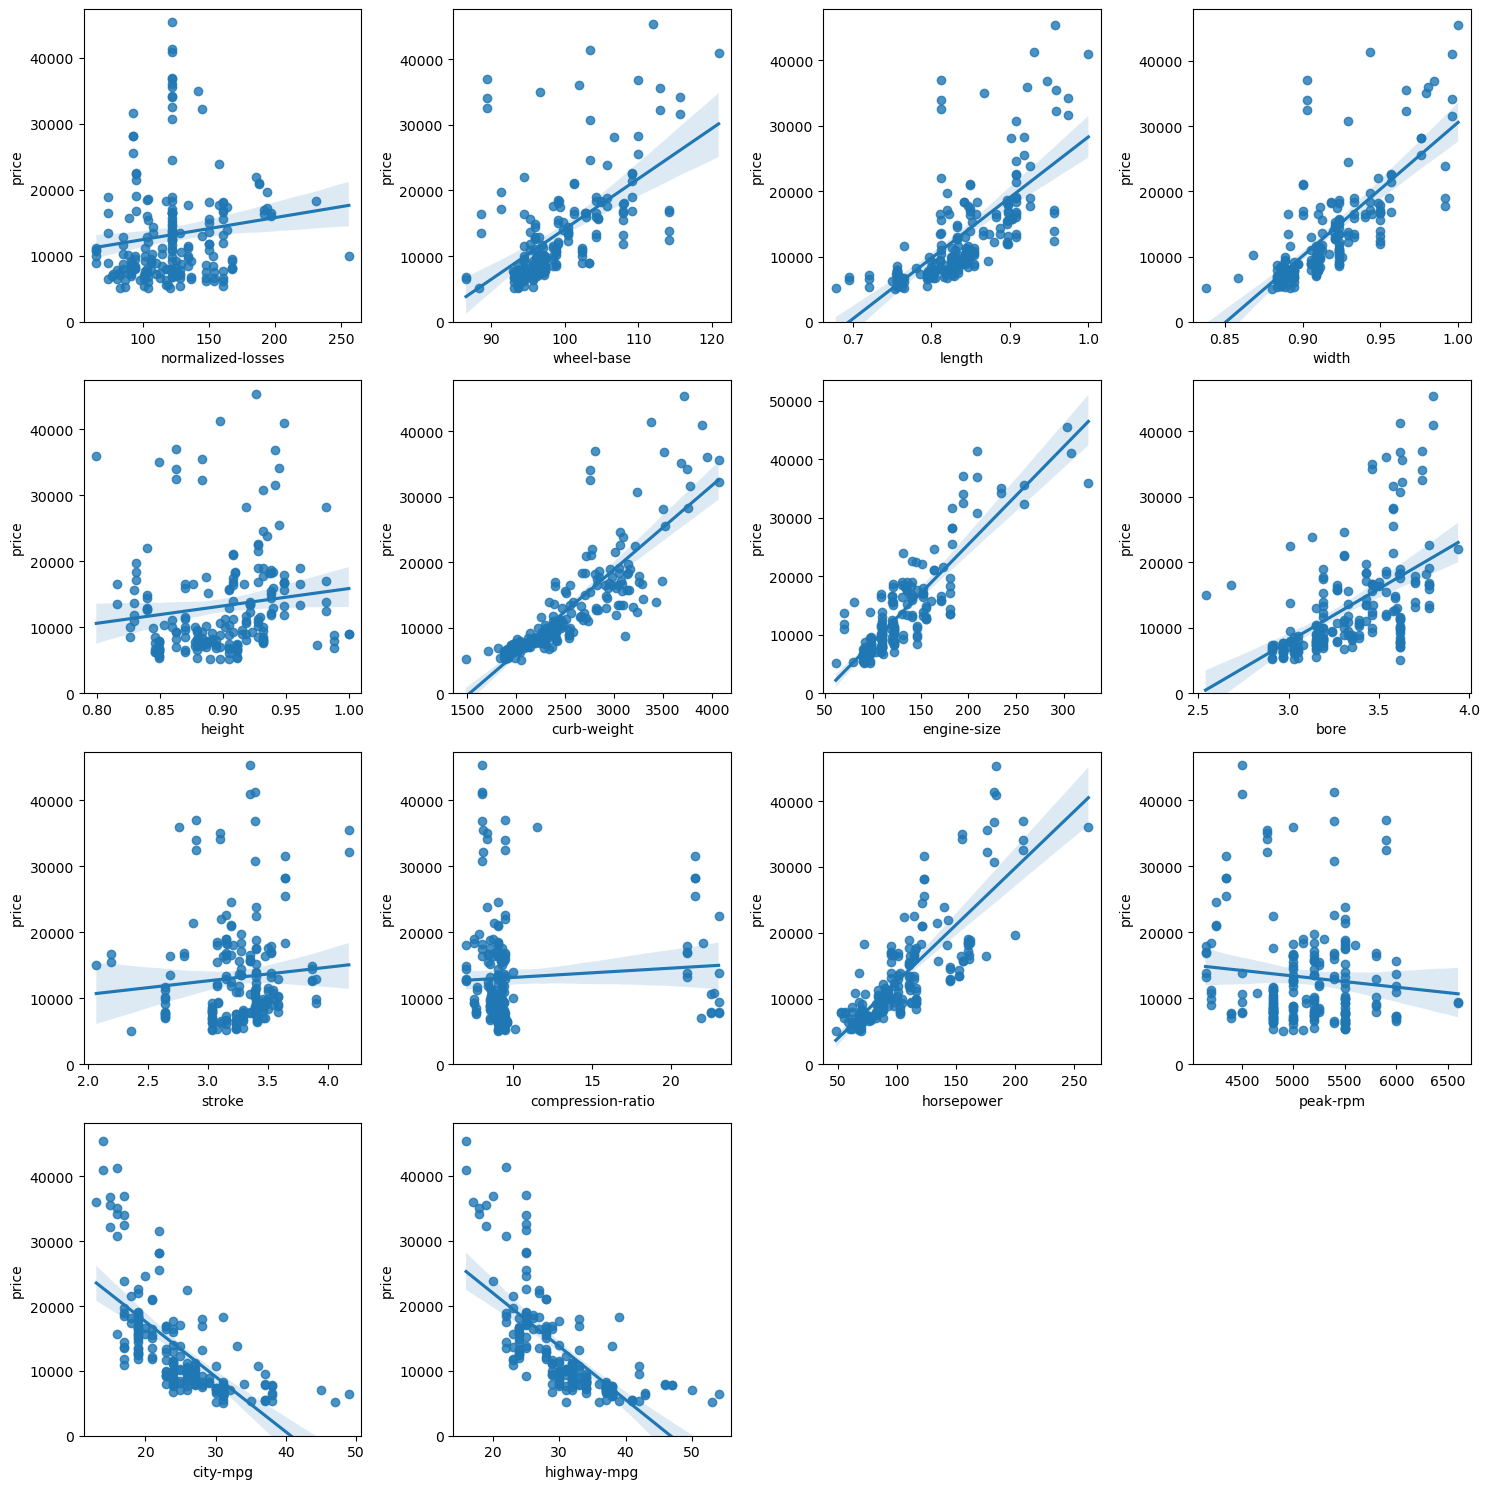

In [40]:
# use regplot

#normalized-losses
plt.figure(figsize=(15,15))
plt.subplot(4,4,1)
sns.regplot(x='normalized-losses',y='price',data=Auto_data)
plt.ylim(0,)
plt.tight_layout()

#wheel-base
plt.subplot(4,4,2)
sns.regplot(x='wheel-base',y='price',data=Auto_data)
plt.ylim(0,)
plt.tight_layout()

#length
plt.subplot(4,4,3)
sns.regplot(x='length',y='price',data=Auto_data)
plt.ylim(0,)
plt.tight_layout()

#width
plt.subplot(4,4,4)
sns.regplot(x='width',y='price',data=Auto_data)
plt.ylim(0,)
plt.tight_layout()

#height
plt.subplot(4,4,5)
sns.regplot(x='height',y='price',data=Auto_data)
plt.ylim(0,)
plt.tight_layout()

#curb-weight
plt.subplot(4,4,6)
sns.regplot(x='curb-weight',y='price',data=Auto_data)
plt.ylim(0,)
plt.tight_layout()

# engine-size
plt.subplot(4,4,7)
sns.regplot(x='engine-size',y='price',data=Auto_data)
plt.ylim(0,)
plt.tight_layout()

# bore
plt.subplot(4,4,8)
sns.regplot(x='bore',y='price',data=Auto_data)
plt.ylim(0,)
plt.tight_layout()

# stroke
plt.subplot(4,4,9)
sns.regplot(x='stroke',y='price',data=Auto_data)
plt.ylim(0,)
plt.tight_layout()

# compression-ratio
plt.subplot(4,4,10)
sns.regplot(x='compression-ratio',y='price',data=Auto_data)
plt.ylim(0,)
plt.tight_layout()

# horsepower
plt.subplot(4,4,11)
sns.regplot(x='horsepower',y='price',data=Auto_data)
plt.ylim(0,)
plt.tight_layout()

# peak-rpm
plt.subplot(4,4,12)
sns.regplot(x='peak-rpm',y='price',data=Auto_data)
plt.ylim(0,)
plt.tight_layout()

#city-mpg
plt.subplot(4,4,13)
sns.regplot(x='city-mpg',y='price',data=Auto_data)
plt.ylim(0,)
plt.tight_layout()

#highway-mpg
plt.subplot(4,4,14)
sns.regplot(x='highway-mpg',y='price',data=Auto_data)
plt.ylim(0,)
plt.tight_layout()


From those plots, we can see "wheel-base", "length", "width", "curb-weight", "engine-size", "bore", "horsepower" are positivley related to price. "City-mpg" and "highway-mpg" are negatively correlated with price. "normalized-losses", "height", "stroke", "compression-ratio", "peak-rpm" are weakly correlated with price. 

In [41]:
#we can use corr() calcualte the correlation ratio between them. For example, "engine-size" and "price"
Auto_data[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [42]:
Auto_data[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


In [43]:
Auto_data[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101612
price,-0.101612,1.000000


__Correlation__ is a measureof the extent of interdependence between variables. __Causation__ is the relationship between cause and effect between two variabels. Correlation does not imply causation. Determing correlation is much simpler than tthe determining causation as causation may require independent experimentation. 

__Pearson Correlation__ measures the linear dependence between two varibles X and Y. 

__P-value__ is the probablility value that the correlatin between these two variables is statistically significant. Normally, we choose a sifnificant level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the 

- p-value is < 0.004: there is strong evidence that the correlation is significant.
- p-value is < 0.05: there is moderate evidence that the correlation is significant.
- p-value is < 0.1: there is weak evidence that the correlation is significant.
- p-value is > 0.1: there is moderate evidence that the correlation is significant.

In [44]:
from scipy import stats

In [45]:
#engine-size
pearson_coef, p_value = stats.pearsonr(Auto_data['engine-size'], Auto_data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622198793e-64


In [46]:
#highway-mpg
pearson_coef, p_value = stats.pearsonr(Auto_data['highway-mpg'], Auto_data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.704692265058953  with a P-value of P = 1.749547114447557e-31


In [47]:
#peak-rpm
pearson_coef, p_value = stats.pearsonr(Auto_data['peak-rpm'], Auto_data['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is -0.10161237413760969  with a P-value of P = 0.15119107066700813


#### Categorical Variables

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

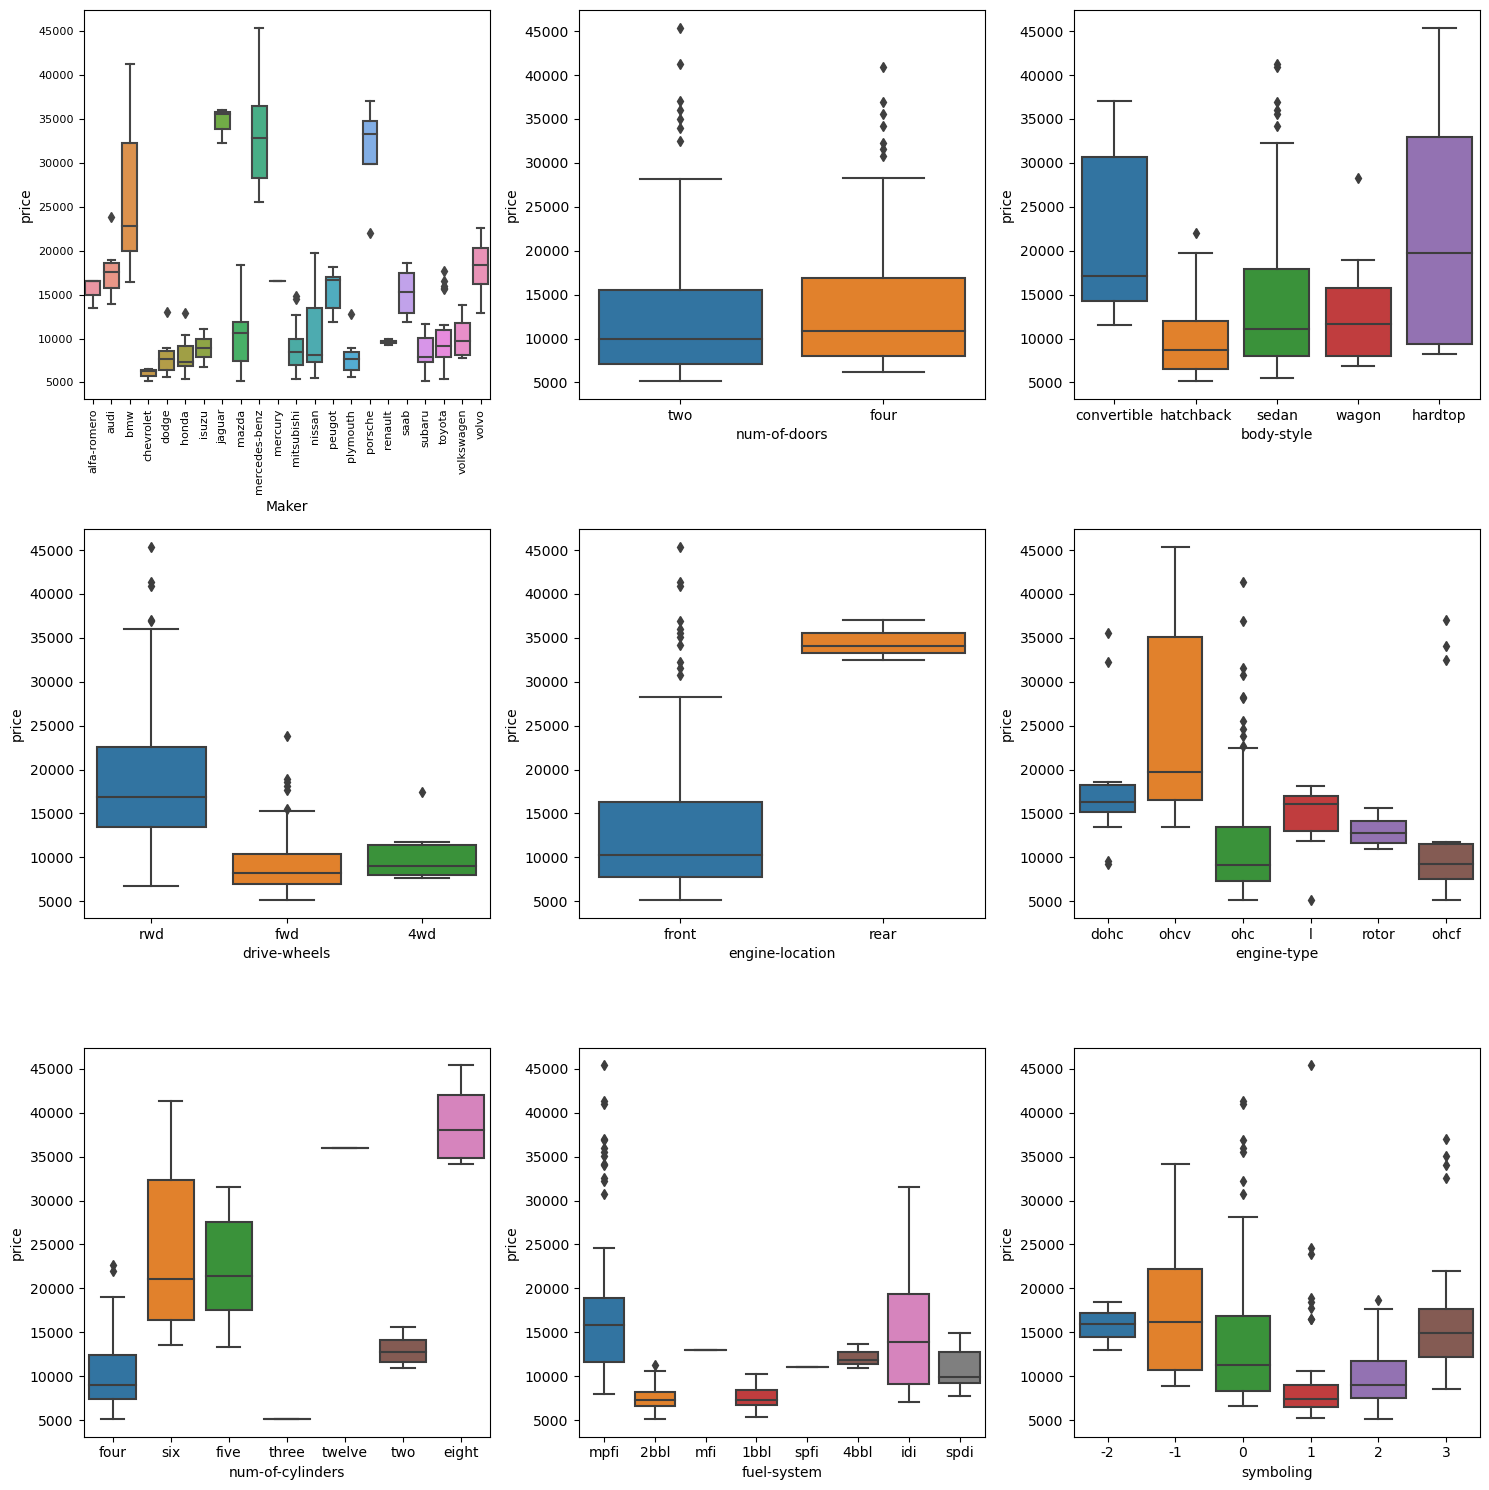

In [48]:
#use boxplot to plot categorical variables

#maker
plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
b=sns.boxplot(x='make',y='price',data=Auto_data)
b.set_xlabel('Maker',fontsize=10)
b.tick_params(labelsize=8)
b.set_xticklabels(b.get_xticklabels(),rotation=90)
plt.tight_layout()

#num-of-doors
plt.subplot(3,3,2)
sns.boxplot(x='num-of-doors',y='price',data=Auto_data)
plt.tight_layout()

#body-style
plt.subplot(3,3,3)
sns.boxplot(x='body-style',y='price',data=Auto_data)
plt.tight_layout()

#drive-wheels
plt.subplot(3,3,4)
sns.boxplot(x='drive-wheels',y='price',data=Auto_data)
plt.tight_layout()

#engine-location
plt.subplot(3,3,5)
sns.boxplot(x='engine-location',y='price',data=Auto_data)
plt.tight_layout()

#engine-type
plt.subplot(3,3,6)
sns.boxplot(x='engine-type',y='price',data=Auto_data)
plt.tight_layout()

#num-of-cylinders
plt.subplot(3,3,7)
sns.boxplot(x='num-of-cylinders',y='price',data=Auto_data)
plt.tight_layout()

#fuel-system
plt.subplot(3,3,8)
sns.boxplot(x='fuel-system',y='price',data=Auto_data)
plt.tight_layout()

#symboling
plt.subplot(3,3,9)
sns.boxplot(x='symboling',y='price',data=Auto_data)
plt.tight_layout()


We see that the distributions of price between the different categories and price. The luxury car makers have high prices. "num of doors", " body-style", "engine-type", "fuel-system" don't have significant relationship with price. Rear engine cars are more expensive than front engine cars. "rwd" cars are more expensive. Eight or tweleve cycliners' car are pricy. 

##### 3.2 Descriptive Statistical Analysis

<p>The <b>describe</b> function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.</p>

This will show:

<ul>
    <li>the count of that variable</li>
    <li>the mean</li>
    <li>the standard deviation (std)</li> 
    <li>the minimum value</li>
    <li>the IQR (Interquartile Range: 25%, 50% and 75%)</li>
    <li>the maximum value</li>
<ul>


In [49]:
Auto_data.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330697,3.256965,...,103.402985,5117.661692,25.179104,30.686567,13207.129353,9.447761,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,37.365650,478.113747,6.423220,6.815150,7947.066342,2.523590,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5125.000000,24.000000,30.000000,10295.000000,9.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.000000,1.000000,1.000000,1.000000,1.000000


The default setting of "describe" skips variables of type object. We can apply the method "describe" on the variables of type 'object' as follows:

In [50]:
Auto_data.describe(include=['object'])


,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


Another useful method is value counts, which is a good way of understanding how many units of each characteristic/variable we have. 

In [51]:
#symboling
Auto_data['symboling'].value_counts()

symboling
 0    65
 1    52
 2    32
 3    27
-1    22
-2     3
Name: count, dtype: int64

In [52]:
#make
Auto_data['make'].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: count, dtype: int64

In [53]:
#num-of-doors
Auto_data['num-of-doors'].value_counts()

num-of-doors
four    115
two      86
Name: count, dtype: int64

In [54]:
#body-style
Auto_data['body-style'].value_counts()

body-style
sedan          94
hatchback      68
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [55]:
#drive-wheels
Auto_data['drive-wheels'].value_counts()

drive-wheels
fwd    118
rwd     75
4wd      8
Name: count, dtype: int64

In [56]:
#engine-location
Auto_data['engine-location'].value_counts()

engine-location
front    198
rear       3
Name: count, dtype: int64

In [57]:
#engine-type
Auto_data['engine-type'].value_counts()

engine-type
ohc      145
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
Name: count, dtype: int64

In [58]:
#engine-type
Auto_data['num-of-cylinders'].value_counts()

num-of-cylinders
four      157
six        24
five       10
two         4
eight       4
three       1
twelve      1
Name: count, dtype: int64

In [59]:
#fuel-system
Auto_data['fuel-system'].value_counts()

fuel-system
mpfi    92
2bbl    64
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

##### 3.3 Basics of Grouping

The "groupby" method groups data by different categories. The data is grouped based on one or several variables, and analysis is performed on the individual groups.

For example, let's group by the variable "drive-wheels". We see that there are 3 different categories of drive wheels.

In [60]:
Auto_data['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know, on average, which type of drive wheel is most valuable, we can group "drive-wheels" and then average them.

We can select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one".

In [61]:
group_one = Auto_data[['drive-wheels','price']]

We can then calculate the average price for each of the different categories of data.

In [62]:
# grouping results
group_one = group_one.groupby(['drive-wheels'],as_index=False).mean()
group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


From our data, it seems rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel and front-wheel are approximately the same in price.

You can also group by multiple variables. For example, let's group by both 'drive-wheels' and 'body-style'. This groups the dataframe by the unique combination of 'drive-wheels' and 'body-style'. We can store the results in the variable 'grouped_two'.

In [63]:
group_two = Auto_data[['drive-wheels', 'body-style', 'price']]
group_two = group_two.groupby(['drive-wheels', 'body-style'],as_index=False).mean()
group_two

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method "pivot" to create a pivot table from the groups.

In this case, we will leave the drive-wheels variable as the rows of the table, and pivot body-style to become the columns of the table:

In [64]:
grouped_pivot = group_two.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

__Summary__



We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:

<ul>
    <li>wheel-base</li>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>bore</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
</ul>

Categorical variables:

<ul>
    <li>Drive-wheels</li>
    <li>engine-location</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

### 4. Model Development

In this section, we will develop several models that will predict the price of the car using the variables or features. This is just an estimate but should give us an objective idea of how much the car should cost. 

Some quiesitons we want to ask in this module:
- Do I know if the dealer is offering fair value for my trade-in?
- Do I know if I put a fair value on my car?

A model will hlep us understand the exact relationship between different variabels and how these variables are used to predict the reult.

In [65]:
#import libraries
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

We will try several models here to compare their accuracy on prediction of car price. 

#### 4.1 Linear Regression

We know that the car price is correlated to multiple variables, so we use __Multiple Linear Regression__ here. 

When evaluating the models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is. Two very importatn measures that are often used in Statistics to determine the accuracy of a model are:
- __R^2/R-squared__
- __Mean Squared Error(MSE)__

We will use these two measures to evaluate the models. 

In [66]:
#import linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [67]:
#save the variabels and price to new variables
Variables = Auto_data[['wheel-base', 'length', 'width', 'curb-weight', 'engine-size', 'bore', 'horsepower', 'city-mpg', 'highway-mpg']]
Price = Auto_data['price']

Normally, we split the data into training data and testing data. 

In [68]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(Variables, Price, test_size=0.20, random_state=1)

In [69]:
#create linear regression object
lm = LinearRegression()

In [70]:
#fit the linear regression
lm.fit(x_train, y_train)

LinearRegression()

In [71]:
#Let's calcualte the R^2 on the train data
print('The R-square of Linear Regression is: ', round(lm.score(x_train, y_train),4))

The R-square of Linear Regression is:  0.8272


In [72]:
#Let's calcualte the R^2 on the test data
print('The R-square of Linear Regression is: ', round(lm.score(x_test, y_test),4))

The R-square of Linear Regression is:  0.7493


We see that the R^2 score on training data is better than testing data. This is normal, since the model learned on training data.

In [73]:
#predict price using test data
lm_predict = lm.predict(x_test)

In [74]:
mse = mean_squared_error(y_test, lm_predict)
print('The mean square error of price and predicted value is: ', round(mse,2))

The mean square error of price and predicted value is:  13284750.65


In [75]:
,2# Visualize the results
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

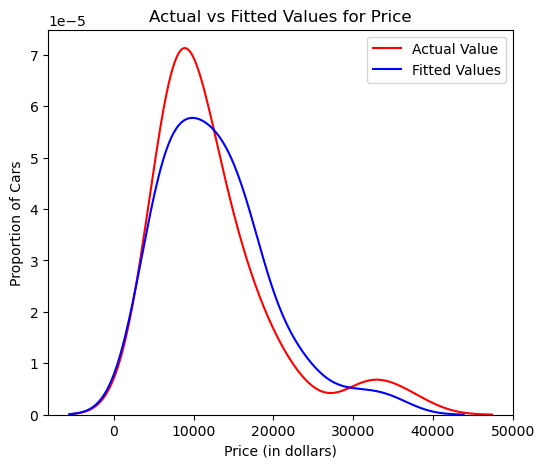

In [76]:
#plot the results
plt.figure(figsize=(6, 5))

ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(lm_predict, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

#### 4.2 Polynomial Regression

__Polynomial Regression__ is a particular case of the general linear regression model or multiple linear regression models. It use non-lieanr relationshipls using high order polynomial terms to fit the variables.

In [77]:
#import the library
from sklearn.preprocessing import PolynomialFeatures

Data Pipelines simplify the steps of processing the data. We use the module __Pipeline__ to create a pipeline. We also use __StandardScaler__ as a step in our pipeline. This pipeline connect linear regression, polynomial regression and standard scaler.

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [79]:
#We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model',LinearRegression())]

In [80]:
pipe=Pipeline(Input)

In [81]:
#standard scaler takes float as inputs. Let's convert Variables data type.
Variables = Variables.astype(float)

In [82]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [83]:
# Find the R^2 for polynomial fit
print('The R-square of Polynomial Regression is: ', round(pipe.score(x_test, y_test),4))

The R-square of Polynomial Regression is:  0.8636


In [84]:
price_pipe = pipe.predict(x_test)

In [85]:
mse = mean_squared_error(y_test, price_pipe)
print('The mean square error of price and predicted value is: ', round(mse,2))

The mean square error of price and predicted value is:  7231103.48


From R^2 and MSE, it is obvious that polynomial regression fitted the data better. 

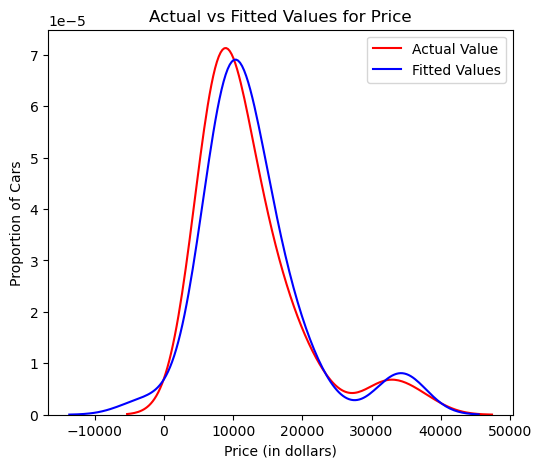

In [86]:
#plot the results
plt.figure(figsize=(6, 5))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(price_pipe, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()
plt.close()

We can see that the fitted values are more reasonably close to the actual values.

#### 4.3 Ridge Regression

Ridge regression is a method of estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated. Here I compare it with other two regressions. I use __GridSearchCV__ to find the best hyperparameter.

In [87]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [88]:
#define the parameters
parameters= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

In [89]:
#create ridge regression object
RR = Ridge()

In [90]:
#create a ridge grid search object
grid = GridSearchCV(RR,parameters,cv=4) #cv determines the number of folds. 

In [91]:
grid.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [92]:
BestRR = grid.best_estimator_
BestRR

Ridge(alpha=1000)

In [93]:
# Find the R^2 for ridge regression fit
print('The R-square of Ridge Regression is: ', round(BestRR.score(x_test, y_test),4))

The R-square of Ridge Regression is:  0.7431


In [94]:
#predict the price
price_ridge = BestRR.predict(x_test)

In [95]:
mse = mean_squared_error(y_test, price_ridge)
print('The mean square error of price and predicted value is: ', round(mse,2))

The mean square error of price and predicted value is:  13617114.78


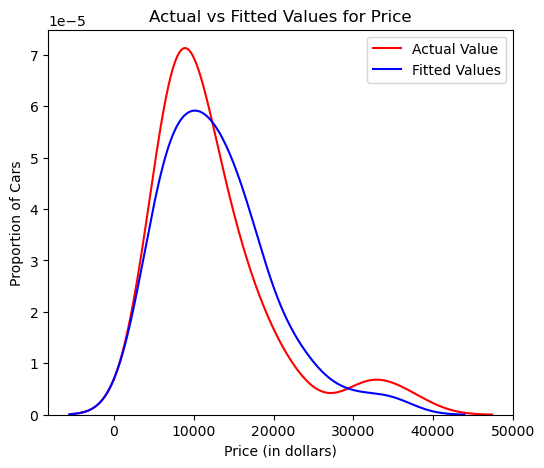

In [96]:
#plot the results
plt.figure(figsize=(6, 5))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(price_ridge, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.legend()
plt.show()
plt.close()

#### 4.4 Decision Tree Regression

Decision tree is used to fit a sine curve with addition noisy observation. As a result, it learns local linear regressions approximating the sine curve. It is a supervised learning approach used in machine learning. 

Regression Trees are implemented using `DecisionTreeRegressor` from `sklearn.tree`

The important parameters of `DecisionTreeRegressor` are

`criterion`: {"mse", "friedman_mse", "mae", "poisson"} - The function used to measure error

`max_depth` - The max depth the tree can be

`min_samples_split` - The minimum number of samples required to split a node

`min_samples_leaf` - The minimum number of samples that a leaf can contain

`max_features`: {"auto", "sqrt", "log2"} - The number of feature we examine looking for the best one, used to speed up training

In [97]:
from sklearn.tree import DecisionTreeRegressor

In [98]:
regression_tree = DecisionTreeRegressor(criterion = "friedman_mse")

In [99]:
regression_tree.fit(x_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse')

In [100]:
print('The R-square of Regression Trees is: ', round(regression_tree.score(x_test, y_test),4))

The R-square of Regression Trees is:  0.9089


In [101]:
price_tree = regression_tree.predict(x_test)

In [102]:
mse = mean_squared_error(y_test, price_tree)
print('The mean square error of price and predicted value is: ', round(mse,2))

The mean square error of price and predicted value is:  4825860.35


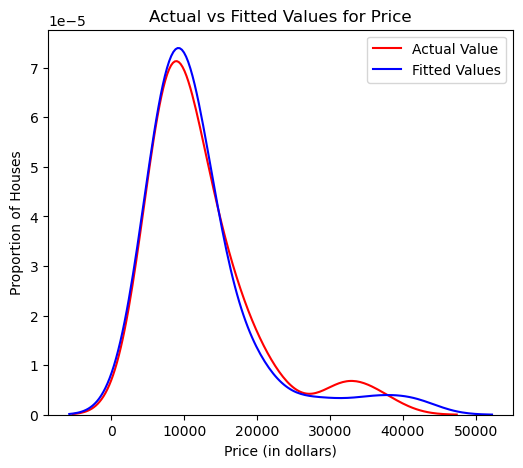

In [103]:
#plot the results
plt.figure(figsize=(6, 5))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(price_tree, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')
plt.legend()

Compared those four models, Regression Trees is the best, which has the highest R^2 score. 

#### 4.5 Support Vector Regression (SVR)
Support vector regression (SVR) is a type of support vector machine (SVM) that is used for regression tasks. It tries to find a function that best predicts the continuous output value for a given input value.

SVR can use both linear and non-linear kernels. A linear kernel is a simple dot product between two input vectors, while a non-linear kernel is a more complex function that can capture more intricate patterns in the data. The choice of kernel depends on the data’s characteristics and the task’s complexity.

In [104]:
from sklearn.svm import SVR 

param_grid = {'C': np.logspace(-2, 3, 10), 
              'gamma': np.logspace(-4, 1, 10),
              'epsilon': np.logspace(-2,1,5),
              'kernel': ['linear']}  

# create an SVR model with a linear kernel 
svr = SVR()
svr_grid = GridSearchCV(svr, param_grid, refit=True)
svr_grid.fit(x_train, y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': array([1.00000000e-02, 3.59381366e-02, 1.29154967e-01, 4.64158883e-01,
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03]),
                         'epsilon': array([ 0.01      ,  0.05623413,  0.31622777,  1.77827941, 10.        ]),
                         'gamma': array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01]),
                         'kernel': ['linear']})

In [105]:
print("tuned hpyerparameters :(best parameters) ",svr_grid.best_params_)
SVR_Best_Score = svr_grid.best_score_
print("accuracy :",SVR_Best_Score)

tuned hpyerparameters :(best parameters)  {'C': 1.6681005372000592, 'epsilon': 0.01, 'gamma': 0.0001, 'kernel': 'linear'}
accuracy : 0.7858887744035078


In [106]:
print('The R-square of SVR is: ', round(svr_grid.score(x_test, y_test),4))
price_svr = svr_grid.predict(x_test)
mse = mean_squared_error(y_test, price_svr)
print('The mean square error of price and predicted value is: ', round(mse,2))

The R-square of SVR is:  0.7562
The mean square error of price and predicted value is:  12920224.71


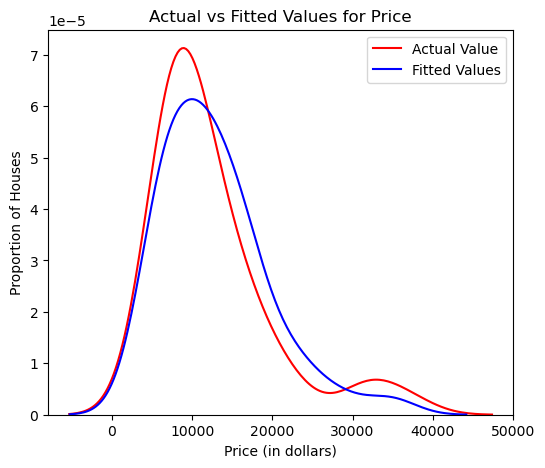

In [107]:
#plot the results
plt.figure(figsize=(6, 5))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(price_svr, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')
plt.legend()

#### 4.6 Lasso Regression

LASSO regression, also known as L1 regularization, is a popular technique used in statistical modeling and machine learning to estimate the relationships between variables and make predictions. LASSO stands for Least Absolute Shrinkage and Selection Operator.

The primary goal of LASSO regression is to find a balance between model simplicity and accuracy. It achieves this by adding a penalty term to the traditional linear regression model, which encourages sparse solutions where some coefficients are forced to be exactly zero. This feature makes LASSO particularly useful for feature selection, as it can automatically identify and discard irrelevant or redundant variables.

In [110]:
from sklearn.linear_model import Lasso
params = {'alpha': (np.logspace(-8, 8, 100))}
lasso = Lasso()
lasso_grid = GridSearchCV(lasso, params, cv = 10)
lasso_grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-08, 1.45082878e-08, 2.10490414e-08, 3.05385551e-08,
       4.43062146e-08, 6.42807312e-08, 9.32603347e-08, 1.35304777e-07,
       1.96304065e-07, 2.84803587e-07, 4.13201240e-07, 5.99484250e-07,
       8.69749003e-07, 1.26185688e-06, 1.83073828e-06, 2.65608778e-06,
       3.85352859e-06, 5.59081018e-06, 8.11130831e-06, 1...
       1.91791026e+04, 2.78255940e+04, 4.03701726e+04, 5.85702082e+04,
       8.49753436e+04, 1.23284674e+05, 1.78864953e+05, 2.59502421e+05,
       3.76493581e+05, 5.46227722e+05, 7.92482898e+05, 1.14975700e+06,
       1.66810054e+06, 2.42012826e+06, 3.51119173e+06, 5.09413801e+06,
       7.39072203e+06, 1.07226722e+07, 1.55567614e+07, 2.25701972e+07,
       3.27454916e+07, 4.75081016e+07, 6.89261210e+07, 1.00000000e+08])})

In [111]:
print("Lasso tuned hpyerparameters :(best parameters) ",lasso_grid.best_params_)
SVR_Best_Score = lasso_grid.best_score_
print("Lasso best accuracy :",SVR_Best_Score)

Lasso tuned hpyerparameters :(best parameters)  {'alpha': 2983.6472402833465}
Lasso best accuracy : 0.7867879230255778


In [112]:
print('The R-square of Lasso is: ', round(lasso_grid.score(x_test, y_test),4))
price_svr = lasso_grid.predict(x_test)
mse = mean_squared_error(y_test, price_svr)
print('The mean square error of price and predicted value is: ', round(mse,2))

The R-square of Lasso is:  0.752
The mean square error of price and predicted value is:  13143376.82


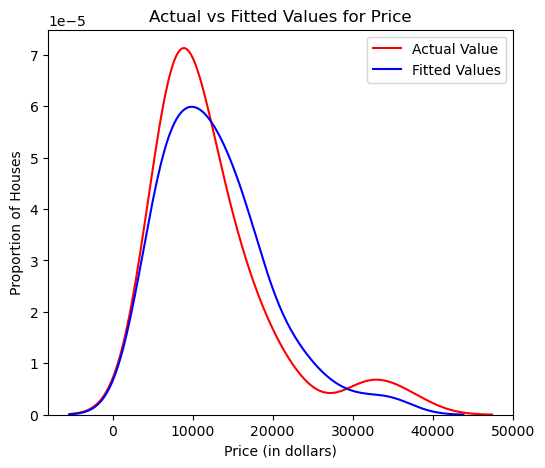

In [113]:
#plot the results
plt.figure(figsize=(6, 5))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(price_svr, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')
plt.legend()

#### 4.7 Gaussian Regression

Gaussian Processes (GP) are a nonparametric supervised learning method used to solve regression and probabilistic classification problems.

The advantages of Gaussian processes are:

- The prediction interpolates the observations (at least for regular kernels).

- The prediction is probabilistic (Gaussian) so that one can compute empirical confidence intervals and decide based on those if one should refit (online fitting, adaptive fitting) the prediction in some region of interest.

- Versatile: different kernels can be specified. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of Gaussian processes include:

- Our implementation is not sparse, i.e., they use the whole samples/features information to perform the prediction.

- They lose efficiency in high dimensional spaces – namely when the number of features exceeds a few dozens.


In [114]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel

In [115]:
kernel = DotProduct() + WhiteKernel()

In [116]:
gpr = GaussianProcessRegressor(kernel=kernel, random_state=2).fit(x_train, y_train)

In [117]:
print('The R-square of Lasso is: ', round(gpr.score(x_test, y_test),4))
price_gpr = gpr.predict(x_test)
mse = mean_squared_error(y_test, price_gpr)
print('The mean square error of price and predicted value is: ', round(mse,2))

The R-square of Lasso is:  0.7961
The mean square error of price and predicted value is:  10804756.83


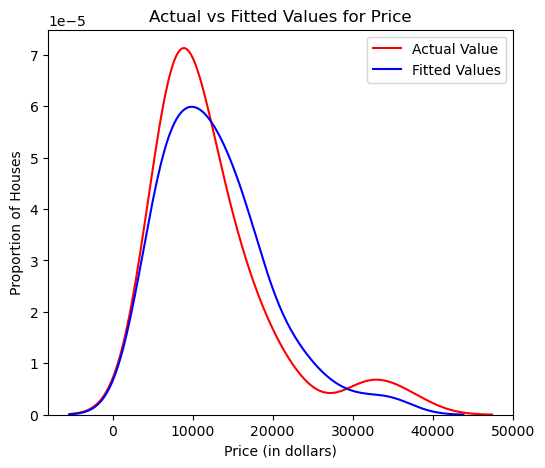

In [118]:
#plot the results
plt.figure(figsize=(6, 5))


ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(price_svr, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Houses')
plt.legend()

### 5. Summary

There are other regression algorithms which can be used on this dataset. Here doens't test all of them. Compared those methods, decision tree regression has the best accuracy.  
